# In this kernel, I will explain data analysis and model writing in a very simple and very modern way
# I will use voting classifier  algorithm and I will use the wonderful library (pandas_profiling ) in the analysis of the data

I hope it will be useful to you

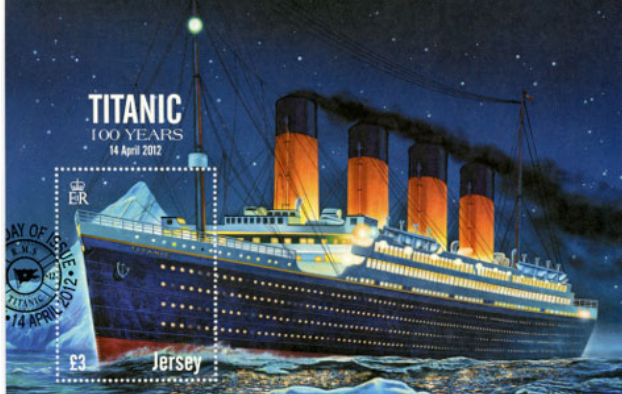

Before everything . I will import the libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import library for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# Acquire data

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Analyze by describing data

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
print("train shape:",train_df.shape)
print("test shape :",test_df.shape)


train shape: (891, 12)
test shape : (418, 11)


In [6]:
train_df.info()
print('_______________________________________________')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_______________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 n

In [7]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# pandas_profiling library 
Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

* Type inference: detect the types of columns in a dataframe.
* Essentials: type, unique values, missing values
* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* Most frequent values
* Histogram
* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* Missing values matrix, count, heatmap and dendrogram of missing values
* Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

**I will put a link to get more information about this library**
[https://github.com/pandas-profiling/pandas-profiling](http://)

In [8]:

from pandas_profiling import ProfileReport 

profile = ProfileReport( train_df, title='Pandas profiling report ' , html={'style':{'full_width':True}})

profile.to_notebook_iframe()


I will also follow some old methods of data analysis to increase focus

In [9]:
train_df.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
train_df.describe(include=['O'])

Name   Sex Ticket Cabin  \
count                                           891   891    891   204   
unique                                          891     2    681   147   
top     Renouf, Mrs. Peter Henry (Lillian Jefferys)  male   1601    G6   
freq                                              1   577      7     4   

       Embarked  
count       889  
unique        3  
top           S  
freq        644

Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.



In [11]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In this part, I enlisted the help of Mr. (Manav Sehgal). I benefited a lot from him. This is for the scientific safety
### Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

- We decide to retain the new Title feature for model training.

In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

We can replace many titles with a more common name or classify them as `Rare`.

In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

We can convert the categorical titles to ordinal.

In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [15]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape


((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [16]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


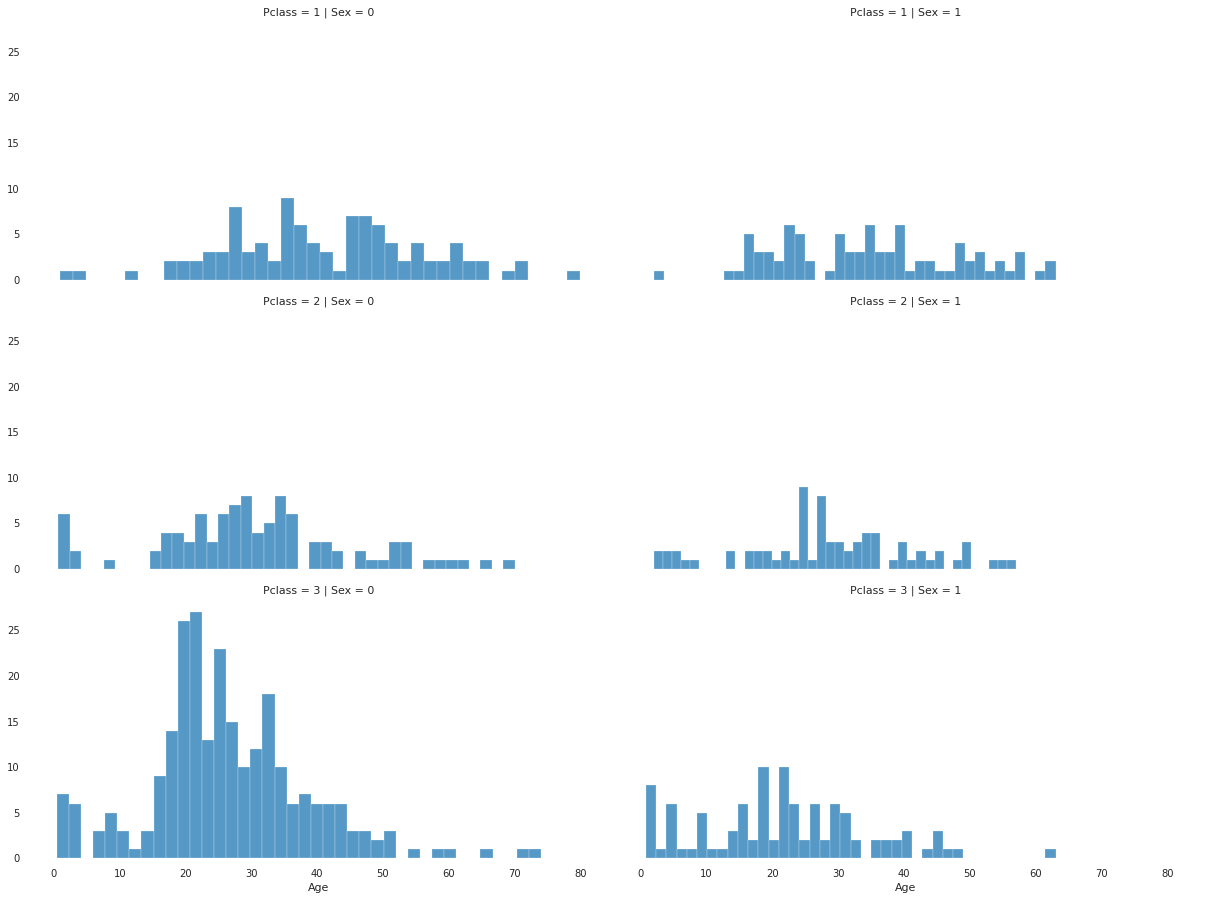

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=4.2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.75, bins=40)
grid.add_legend()

1. Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [18]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [19]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      1
1         1       1    1   38      1      0  71.2833        C      3
2         1       3    1   26      0      0   7.9250        S      2
3         1       1    1   35      1      0  53.1000        S      3
4         0       3    0   35      0      0   8.0500        S      1

Let us create Age bands and determine correlations with Survived.

In [20]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

# Let us replace Age with ordinals based on these bands.

In [21]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

*We can not remove the AgeBand feature.

In [22]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      1
1         1       1    1    2      1      0  71.2833        C      3
2         1       3    1    1      0      0   7.9250        S      2
3         1       1    1    2      1      0  53.1000        S      3
4         0       3    0    2      0      0   8.0500        S      1

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [23]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

We can create another feature called IsAlone.

In [24]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [25]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1

We can also create an artificial feature combining Pclass and Age.

In [26]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2

### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [27]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [28]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [29]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6

### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [30]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2   7.8292         2      1        1          6
1          893       3    1    2   7.0000         0      3        0          6
2          894       2    0    3   9.6875         2      1        1          6
3          895       3    0    1   8.6625         0      1        1          3
4          896       3    1    1  12.2875         0      3        0          3

We can not create FareBand.

In [31]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

Convert the Fare feature to ordinal values based on the FareBand.

In [32]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6
5         0       3    0    1     1         2      1        1          3
6         0       1    0    3     3         0      1        1          3
7         0       3    0    0     2         0      4        0          0
8         1       3    1    1     1         0      3        0          3
9         1       2    1    0     2         1      3        0          0

# the test dataset is.

In [33]:
test_df.head(10)

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6
3          895       3    0    1     1         0      1        1          3
4          896       3    1    1     1         0      3        0          3
5          897       3    0    0     1         0      1        1          0
6          898       3    1    1     0         2      2        1          3
7          899       2    0    1     2         0      1        0          2
8          900       3    1    1     0         1      3        1          3
9          901       3    0    1     2         0      1        0          3

# our data spliting is 

In [34]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# now let's writ the model 
I used voting classifier algorithm with many  different algorithms


In [35]:

#Applying VotingClassifier Model 

'''
#ensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)
'''

#loading models for Voting Classifier

LRModel_ = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=33)

GBCModel_ = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=7, random_state=33)

DTModel_ = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,random_state = 33)

RFModel_ = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=10, random_state=33)

SVCModel_ = SVC(kernel = 'rbf', random_state = 33,C = 0.1,degree = 2)

GaussianNBModel_ = GaussianNB()

KNNModel_ = KNeighborsClassifier(n_neighbors= 4 , weights ='uniform', algorithm='auto')

NNModel_ = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100, 3),learning_rate='constant',activation='tanh')

SGDModel_ = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5)

#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('LRModel',LRModel_),('GBCModel',GBCModel_),('DTModel',DTModel_),('RFModel',RFModel_),('SVCModel',SVCModel_),('GaussianNBModel',GaussianNBModel_),('KNNModel',KNNModel_),('NNModel',NNModel_),('SGDModel',SGDModel_)], voting='hard')

VotingClassifierModel.fit(X_train, Y_train)

#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, Y_train))

print('----------------------------------------------------')


#Calculating Prediction
Y_predtrain = VotingClassifierModel.predict(X_train)
print('Predicted Value for VotingClassifierModel is : ' , Y_predtrain[:10])



/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifierModel Train Score is :  0.8619528619528619
----------------------------------------------------
Predicted Value for VotingClassifierModel is :  [0 1 0 1 0 0 0 1 1 1]



# Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
 

In [36]:

AccScore = accuracy_score(Y_train,Y_predtrain, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  768


# Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)


In [37]:


F1Score = f1_score(Y_train,Y_predtrain, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.8619528619528619


Lets take help of confusion matrix to find out TP TN FP FN.A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.



Confusion Matrix is : 
 [[512  37]
 [ 86 256]]


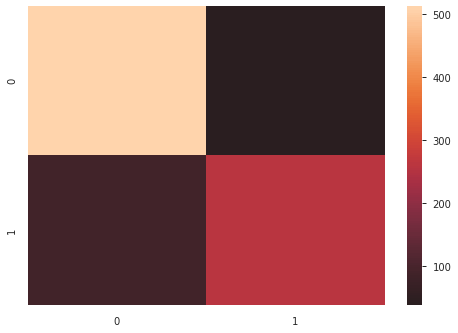

In [38]:

#Calculating Confusion Matrix
CM = confusion_matrix(Y_train,Y_predtrain)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

# Making and Printing our predictions



In [39]:


#Calculating Prediction
Y_pred = VotingClassifierModel.predict(X_test)
print('Predicted Value for VotingClassifierModel is : ' , Y_pred[:10])



Predicted Value for VotingClassifierModel is :  [0 0 0 0 1 0 1 0 1 0]


Finally, we save the prediction in the following file

In [40]:

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred })

submission.to_csv('mysubmission.csv',index=False)

In the end, I would like to say that I worked hard on this kernel

# Please appreciate this work and leave me your vote and comment on any negative or positive amendment

I will be happy with it

And thanks for reading